In [6]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
print(tf.__version__)

1.8.0


In [3]:
mnist = tf.keras.datasets.fashion_mnist

In [4]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 4s 1us/step


5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 

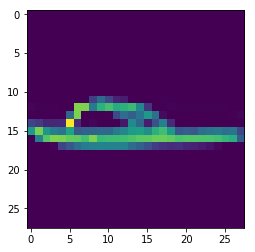

In [9]:
n = 30
plt.imshow(training_images[n])
print(training_labels[n])
print(training_images[n])

In [10]:
# normalization
training_images = training_images/255
test_images = test_images/255

In [17]:
model = keras.Sequential([keras.layers.Flatten(), 
                             keras.layers.Dense(64, activation=tf.nn.relu),
                             keras.layers.Dense(10, activation=tf.nn.softmax)])

In [43]:
model.compile(optimizer=tf.train.AdamOptimizer(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels,epochs=5)

Epoch 1/5
60000/60000 [==============================] - 3s 51us/step - loss: 0.2305 - acc: 0.9128
Epoch 2/5
60000/60000 [==============================] - 3s 46us/step - loss: 0.2235 - acc: 0.9167
Epoch 3/5
60000/60000 [==============================] - 3s 51us/step - loss: 0.2197 - acc: 0.9170
Epoch 4/5
60000/60000 [==============================] - 3s 51us/step - loss: 0.2158 - acc: 0.9193
Epoch 5/5
60000/60000 [==============================] - 3s 48us/step - loss: 0.2113 - acc: 0.9199


In [44]:
model.evaluate(test_images,test_labels)

10000/10000 [==============================] - 0s 35us/step


[0.3498920034110546, 0.8843]

In [23]:
classification = model.predict(test_images)

In [28]:
n=3
print(classification[n])
print(test_labels[n])

[1.4208086e-08 9.9999964e-01 1.6130777e-10 2.4181531e-07 1.4746708e-08
 1.3801929e-15 6.1043714e-08 1.1614105e-22 1.6216953e-12 1.5283608e-19]
1


In [40]:
model = keras.Sequential([keras.layers.Flatten(), 
                             keras.layers.Dense(64, activation=tf.nn.relu),
                             keras.layers.Dense(10, activation=tf.nn.softmax)])

In [41]:
model.compile(optimizer=tf.train.AdamOptimizer(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels,epochs=15)

Epoch 1/15
60000/60000 [==============================] - 3s 51us/step - loss: 0.5286 - acc: 0.8147
Epoch 2/15
60000/60000 [==============================] - 3s 54us/step - loss: 0.3992 - acc: 0.8574
Epoch 3/15
60000/60000 [==============================] - 3s 45us/step - loss: 0.3647 - acc: 0.8680
Epoch 4/15
60000/60000 [==============================] - 3s 45us/step - loss: 0.3403 - acc: 0.8776
Epoch 5/15
60000/60000 [==============================] - 3s 45us/step - loss: 0.3190 - acc: 0.8831
Epoch 6/15
60000/60000 [==============================] - 3s 46us/step - loss: 0.3059 - acc: 0.8881
Epoch 7/15
60000/60000 [==============================] - 3s 45us/step - loss: 0.2951 - acc: 0.8909
Epoch 8/15
60000/60000 [==============================] - 3s 45us/step - loss: 0.2843 - acc: 0.8948
Epoch 9/15
60000/60000 [==============================] - 3s 49us/step - loss: 0.2753 - acc: 0.8973
Epoch 10/15
60000/60000 [==============================] - 3s 51us/step - loss: 0.2660 - acc: 0.9018

In [42]:
model.evaluate(test_images,test_labels)

10000/10000 [==============================] - 0s 35us/step


[0.3426906922698021, 0.8808]

In [45]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.4):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])



Epoch 1/5
60000/60000 [==============================] - 9s 151us/step - loss: 0.4737
Epoch 2/5
60000/60000 [==============================] - 9s 146us/step - loss: 0.3595

Reached 60% accuracy so cancelling training!


In [54]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_22 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
